In [2]:
import numpy as np
import common_functions
from scipy.ndimage import rotate
import multiprocessing
import sys
import skimage as sk
import tifffile as tiff
import warnings
from functools import partial
from joblib import Parallel, delayed
import matplotlib.pyplot as plt
from scipy.stats import ks_2samp
from scipy.stats import norm
import statistics
from copy import copy
from scipy import ndimage as ndi

from skimage.segmentation import watershed
from skimage.feature import peak_local_max
from skimage.filters import rank, sobel
from skimage.morphology import ball, disk

from skimage import exposure, util


In [14]:
time_dome = str(4)
folder_and_dome = str('./../../../../Desktop/dome70_tp'+time_dome+'_fallingline/70_denoised_tp')
wd = folder_and_dome + time_dome

image = sk.io.imread(wd+'.tif')
image_r = common_functions.get_image_r(image)

total_dots = sk.io.imread(wd+'_apical_dots_total_1.tif')
total_dots_r = common_functions.get_image_r(total_dots)

gaussian_1 = sk.io.imread(wd+'_apical_dots_total_gaussian_1.tif')
gaussian_1_r = common_functions.get_image_r(gaussian_1)

epithelial_1 = sk.io.imread(wd+'_apical_dots_total_epithelial_1.tif')
epithelial_1_r = common_functions.get_image_r(epithelial_1)


In [4]:
# Set parameters for AHE
# Determine kernel sizes in each dim relative to image shape
# kernel_size = (epithelial_1.shape[0] // 10, epithelial_1.shape[1] // 10, epithelial_1.shape[2] // 10)
# kernel_size = np.array(kernel_size)
# clip_limit = 0.9

# im_orig_ahe = exposure.equalize_adapthist(epithelial_1, kernel_size=kernel_size, clip_limit=clip_limit)


In [15]:
def clahe_2d(slice, kernel_size, clip_limit, times = 2):

    
    slice_clahe = exposure.equalize_adapthist(slice, kernel_size=kernel_size, clip_limit=clip_limit)

    for i in range(times-1):
        slice_clahe = exposure.equalize_adapthist(slice_clahe, kernel_size=kernel_size, clip_limit=clip_limit)
    
    slice_clahe = exposure.equalize_hist(slice_clahe)
    slice_clahe = common_functions.normalize_image(slice_clahe)
    # plt.imshow(slice_clahe)

    return slice_clahe

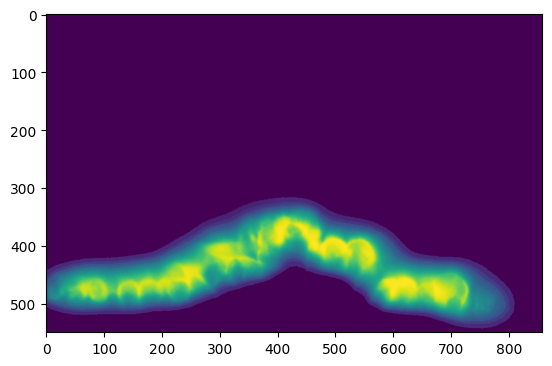

In [28]:
kernel_size = (epithelial_1.shape[0] // 5, epithelial_1.shape[1] // 5)
kernel_size = np.array(kernel_size)
clip_limit = 0.01

plt.imshow(clahe_2d(epithelial_1_r[168], kernel_size, clip_limit, times=1))


In [29]:
kernel_size = (epithelial_1.shape[0] // 5, epithelial_1.shape[1] // 5)
kernel_size = np.array(kernel_size)
clip_limit = 0.01



epithelial_1_r_clahe = Parallel(n_jobs=-1)(delayed(clahe_2d)(im, kernel_size, clip_limit, times=1) for im in epithelial_1_r)




In [30]:
epithelial_1_clahe = np.transpose(epithelial_1_r_clahe, axes=(1,2,0))



In [33]:
tiff.imwrite(wd+'_apical_dots_total_epithelial_1_clahe_2d_slice.tif', common_functions.normalize_image(epithelial_1_clahe, 255).astype(np.uint8))

: 

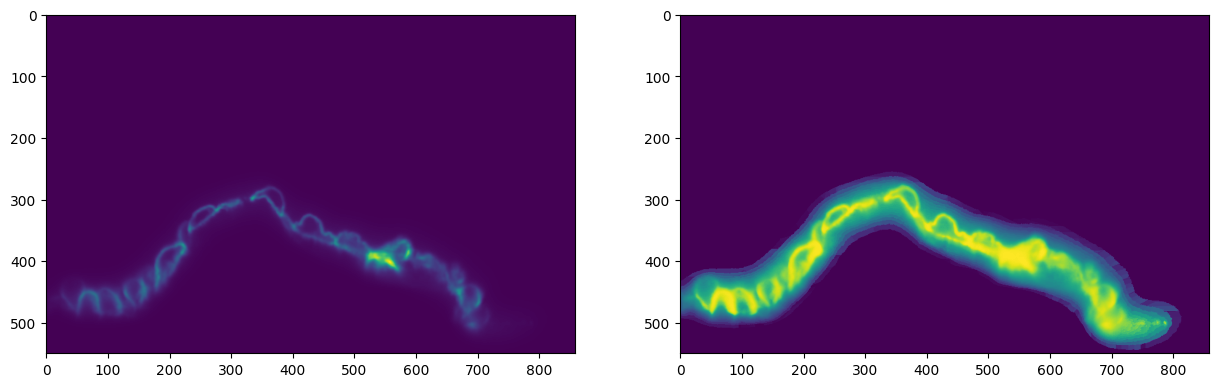

In [89]:
epithelial_1_r_y = epithelial_1_r[300]

plt.figure(figsize=(15,15))

plt.subplot(121)
plt.imshow(epithelial_1_r_y)


kernel_size = (epithelial_1.shape[0] // 5, epithelial_1.shape[1] // 5)
kernel_size = np.array(kernel_size)
clip_limit = 0.05

epithelial_1_r_y_clahe = exposure.equalize_adapthist(epithelial_1_r_y, kernel_size=kernel_size, clip_limit=clip_limit)

epithelial_1_r_y_clahe = exposure.equalize_adapthist(epithelial_1_r_y_clahe, kernel_size=kernel_size, clip_limit=clip_limit)
epithelial_1_r_y_clahe = exposure.equalize_adapthist(epithelial_1_r_y_clahe, kernel_size=kernel_size, clip_limit=clip_limit)
epithelial_1_r_y_clahe = exposure.equalize_adapthist(epithelial_1_r_y_clahe, kernel_size=kernel_size, clip_limit=clip_limit)
epithelial_1_r_y_clahe = exposure.equalize_adapthist(epithelial_1_r_y_clahe, kernel_size=kernel_size, clip_limit=clip_limit)
# epithelial_1_r_y_clahe = exposure.equalize_adapthist(epithelial_1_r_y_clahe, kernel_size=kernel_size, clip_limit=clip_limit)

plt.subplot(122)

epithelial_1_r_y_clahe = exposure.equalize_hist(epithelial_1_r_y_clahe)

plt.imshow(epithelial_1_r_y_clahe)


In [40]:
tiff.imwrite(wd+'_apical_dots_total_epithelial_1_clahe2.tif', im_orig_ahe)